## Project 4: Image clustering.

We have seen in recursion how problems can be solved elegantly by using self-similarity. 

For images, many images may look like the same based on the color, angle, content, etc.

Based on this similarity, we can group similar images together.


Image Similarity compares two images and computes how visually similar they are. The images that are similar can be group together. 


## Applications

Duplicate removal. 
finding a visually similar set so that they can be presented together.

If you go to the photo storage app on your phone, you will see in many cases similar images are grouped togetehr under labels like mountains, kids, water, etc.

## How do we group visually similar images without having to go through each of them?

One way to do this is clustering.

### Clustering

Clustering allows us to automatically group images into semantically meaningful clusters when ground-truth annotations are absent.

Semantically meaningful clusters will not only consider the pixel colors but also the subject of the image.

Like this image below.

[Clusters from ImageNet](https://images.app.goo.gl/tdFJdsdT1o7VK1Nq9)





## In this project, we will apply machine learning tecniques to cluster similar images together.

To do this, we will use

* [Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/): a deep leraning library that is easy to use and learn.
* [sklearn]((https://scikit-learn.org/stable/auto_examples/cluster/plot_birch_vs_minibatchkmeans.html#sphx-glr-auto-examples-cluster-plot-birch-vs-minibatchkmeans-py)): machine learning library with many methods for calculating features and building ML models. 
* [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html): Visulization, plotting
* [pandas](https://pandas.pydata.org/docs/user_guide/10min.html): If your data likes table format, this is a good library to maintain and 
* [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html): If you like pixel values in your images as arrays to quickly do computation, numpy will get this done.
* [pickle](https://pythonbasics.org/pickle/): You have some computed results and would like to save them. Use pickle for efficient storage.

in this project. 

You probably want to explore these libraries even after finishing this project. You will use sklearn in CS 251, and numpy in CS 343 at Colby.

We will continue using these libraries for our projects, the final project, and other computing courses at Colby.

Let's get started!

## First, let's install the packages we will use

In [1]:
# source: https://pypi.org/project/keras/
# source: https://pypi.org/project/tensorflow/
!pip install keras
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python -m pip install --upgrade pip


## Import libraries

**Note** If you would like to know how each of the methods in each line works, go to the documentation (listed above) and paste the name of the method in the search bar. 


In [2]:
#for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

2023-10-19 20:55:32.696707: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 20:55:32.726758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 20:55:32.726793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 20:55:32.726826: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 20:55:32.733150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 20:55:32.733528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Step 1

Run the following cell. Its output will tell you the current location of this notebook.

In [4]:
!pwd

/workspaces/CS166_Project4


## Step 2
To pass all the images into our clutsering procedure, we need to first get the names of the files in to a list, so that we can pass it to our clutsering method.

In [5]:
#this lets your notebooks find the folder location where the images are located
path = "/workspaces/CS166_Project4/flowers"

# this changes the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [6]:
print(flowers) 

['0123.png', '0097.png', '0080.png', '0013.png', '0108.png', '0183.png', '0173.png', '0106.png', '0131.png', '0113.png', '0002.png', '0178.png', '0120.png', '0046.png', '0143.png', '0155.png', '0083.png', '0085.png', '0115.png', '0075.png', '0058.png', '0177.png', '0204.png', '0027.png', '0128.png', '0166.png', '0018.png', '0203.png', '0175.png', '0040.png', '0093.png', '0001.png', '0192.png', '0019.png', '0202.png', '0066.png', '0164.png', '0209.png', '0053.png', '0030.png', '0153.png', '0168.png', '0161.png', '0021.png', '0014.png', '0118.png', '0007.png', '0162.png', '0199.png', '0193.png', '0051.png', '0102.png', '0028.png', '0138.png', '0124.png', '0101.png', '0011.png', '0009.png', '0100.png', '0114.png', '0181.png', '0020.png', '0052.png', '0031.png', '0094.png', '0074.png', '0182.png', '0125.png', '0056.png', '0126.png', '0195.png', '0116.png', '0061.png', '0045.png', '0165.png', '0205.png', '0132.png', '0029.png', '0135.png', '0208.png', '0055.png', '0152.png', '0038.png', '01

### `flowers` contain the names of all the files we have in our data folder `flower`

## Task 1: write code to sort the list of flowers (2 points)

In [7]:
## write code to sort the list of flowers





## Task 2: write a function `get_data(path)` (4 points)

Here `path` represents where the data is located
the function returns `flowers` represents the list with names of all the image files.

In [20]:
# write get_data

def get_data(path, data_list):














    

SyntaxError: incomplete input (3811738181.py, line 18)

## Step 3

Next we will load all the images into the same size. Beacuse we are in Python, converting the pixels of image into arrays make sense (we have s=done this when using OpenCV).

Let's take the first image in the list and load as a 224 x 224 array.

In [16]:
#load the image as a 224x224 array
img = load_img(flowers[0], target_size=(224,224))

# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


This means the image above has 224 x 224 dimension and 3 channels of colors (Red, Green, Blue)

Next, we want to reshape the image to have an extra dimension for index so that we can easily track and store the image. 

In [17]:
# creates a new dimension at the front using which we can track which image it is
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)


(1, 224, 224, 3)


## Step 4

In this lab, we will use a small dataset of flowers that we have loaded earlier. The dataset contain 210 images of flowers. We want to generate cluster of images that are visually similar.

210 images are not adequate to train a machine learning model. Instead, we will use already built models that will process the images for us so that the computer can easily find the visual similarity. 

The already built model expects data in a ceratin format. We will use `preprocess_input()` to get that format.

In [18]:
prepared_data = preprocess_input(reshaped_img)
prepared_data.shape

(1, 224, 224, 3)

## Step 5

Now we load the model. 


In [19]:
# load model, in this line we are use VGG16, https://keras.io/api/applications/vgg/
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# use the model to process our images, this allows us to make the computer see similarity
features = model.predict(prepared_data, use_multiprocessing=True)

print(features.shape)
(1,4096)

1/1 [==============================] - 0s 160ms/step
(1, 4096)


(1, 4096)

We have loaded the images and processed each of them so that they are described by 4096 characteristics.

We will use these characteristics to compute similarity an dcluster them

Putting these altogether, we write a function.



## Task 3: write a function `extract features(image_file, model)` (4 points)

where the features from the image file is returned by the function.

In [15]:
def extract_features(file, model):
    
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [21]:
data = {}

# we have defined this pickle file so that we can store the extracted features for each image in to this file
p = "/workspaces/CS166_Project4/flower_features.pkl"

# loop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        # we are using flower variable as the key in this dictionary
        feat = extract_features(flower,model)
        data[flower] = feat
    
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 77ms/step


In [24]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape


(210, 1, 4096)

This means we have 210 images, each image is described 4096 features.

In [25]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(210, 4096)

we have removed the extra dimension.

Inside flowers folder we have a file flower_labels.csv

First column represents filename, second column represents a catergry label, ranging between 0-9.

In [26]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('flower_labels.csv')


label = df['label'].tolist()
unique_labels = list(set(label))
print(unique_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Step 6: Dimensionality reduction

Beacuse we have so many characteristics (4096), it will slow for the ML model to find the ones that are most useful

Let's help the model in its job by reducing the characteristics.

We will use dimensionality reduction for this, CS 251 will talk about in great details. The one we are using is called [Principal Components Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [29]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)

# x will hold the data described by reduced number of features
x = pca.transform(feat)

In [30]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")


Components before PCA: 4096
Components after PCA: 100


Next we will apply our clustering method. In this case we are using, [Kmeans-clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).
This is an unsupervised machine elarning method, which means it does not require labels.

In [31]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=22)

In [26]:

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

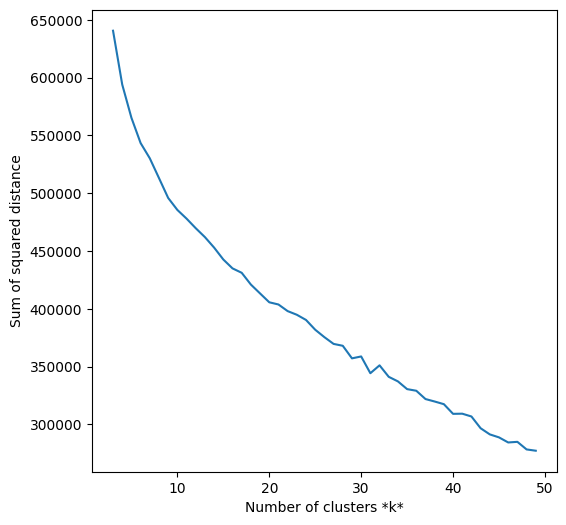

In [28]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        
   
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Clipping cluster size from 35 to 30


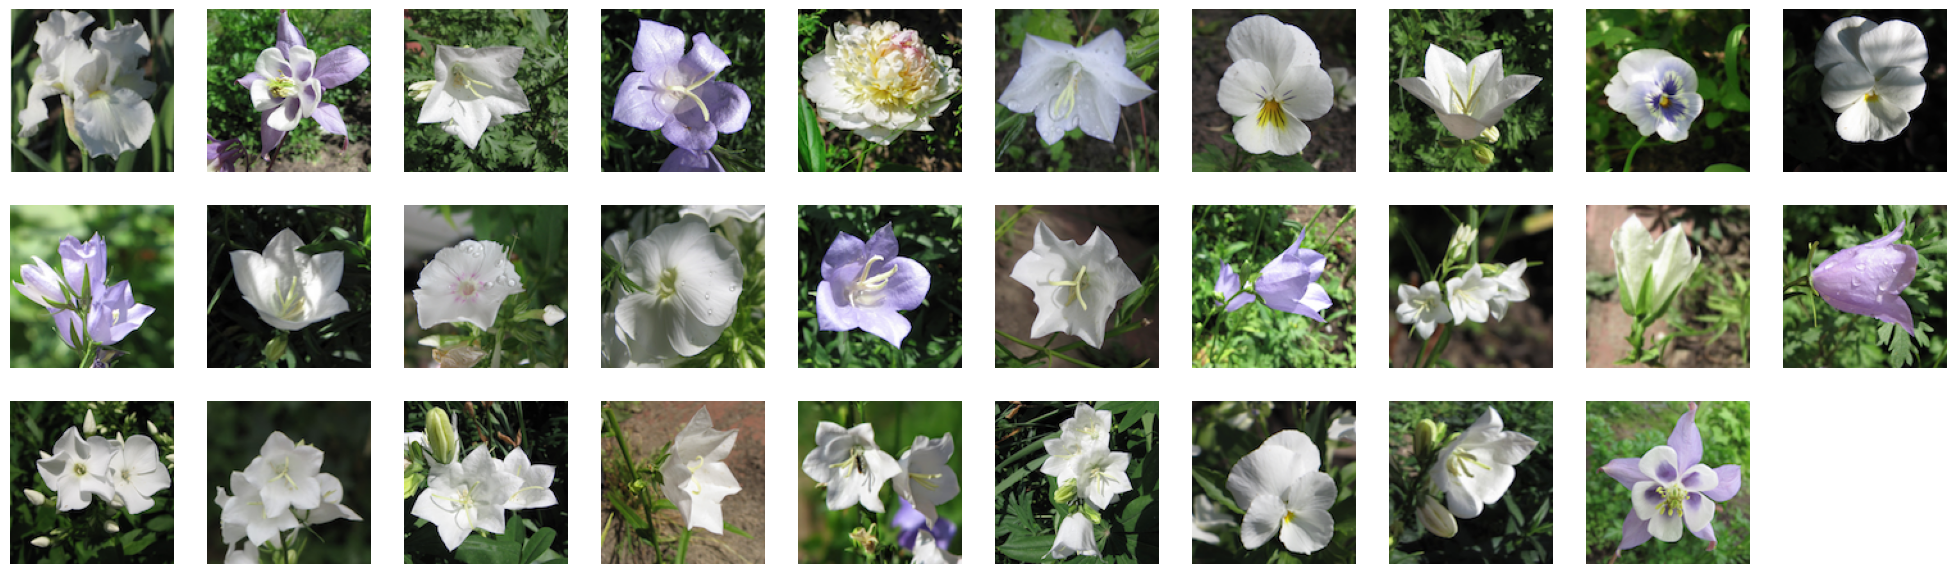

In [29]:
view_cluster(0)

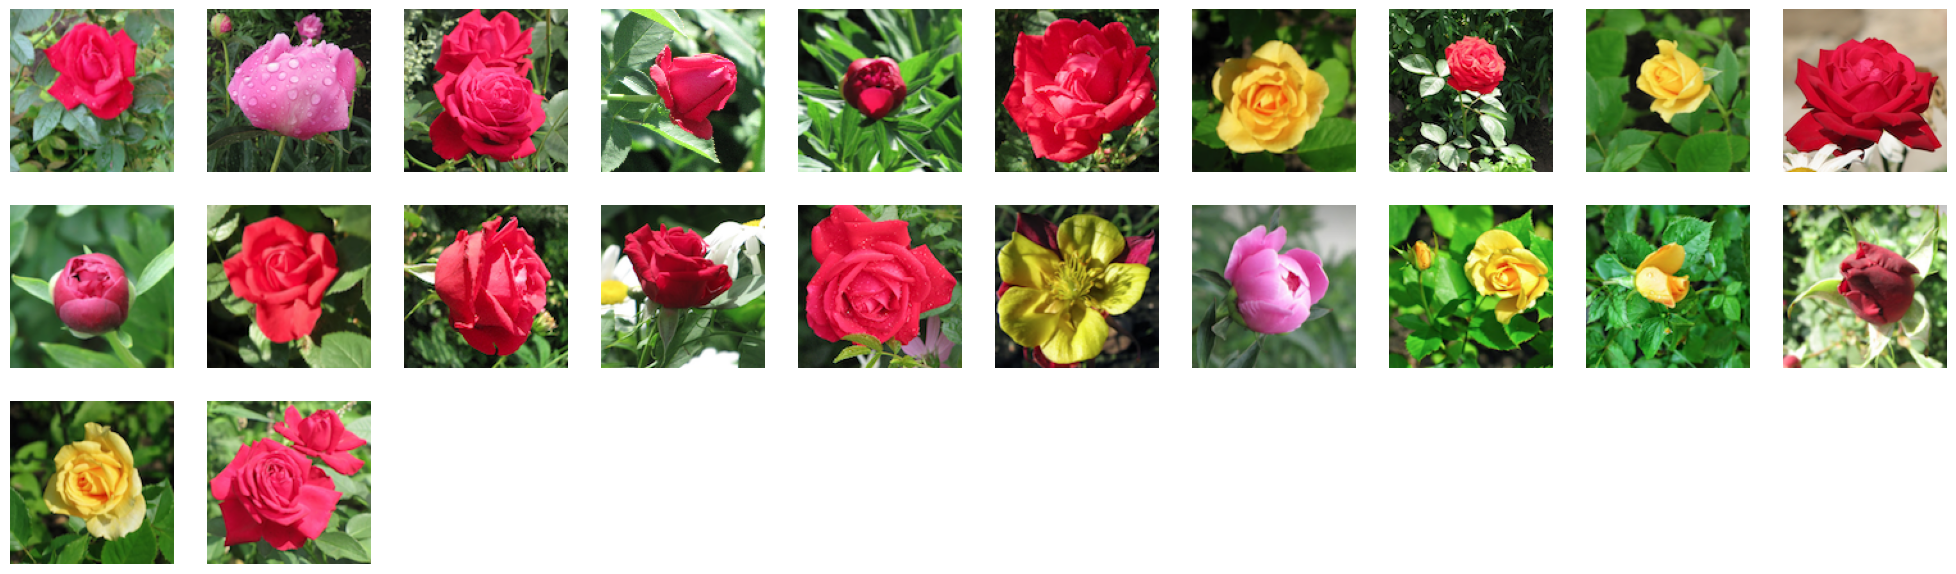

In [30]:
view_cluster(9)

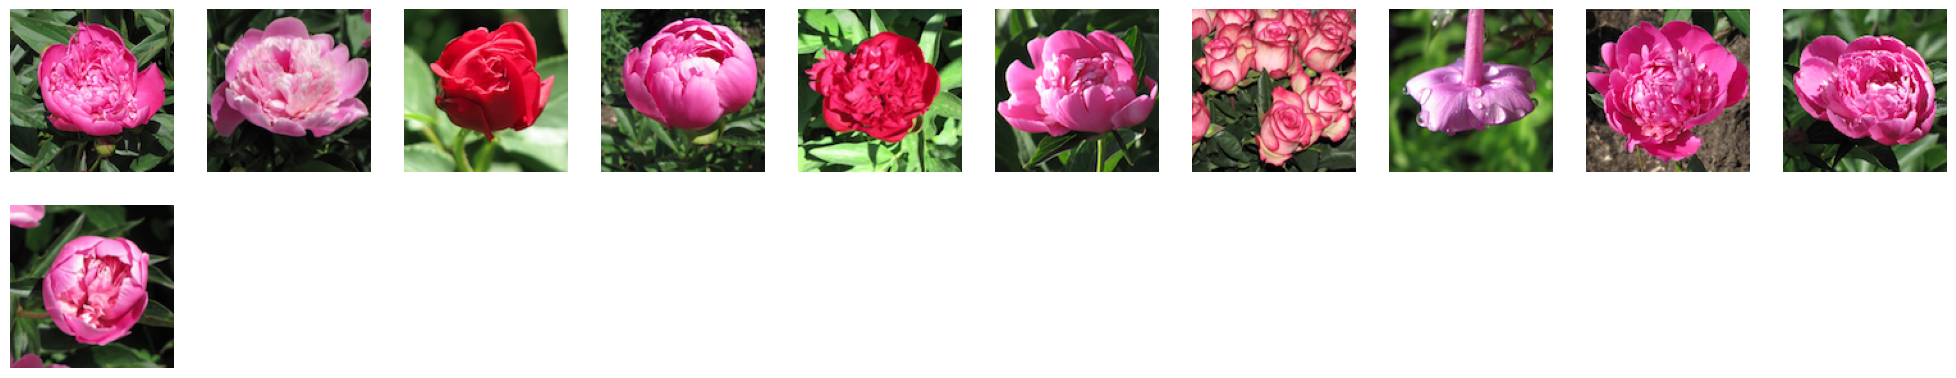

In [31]:
view_cluster(8)

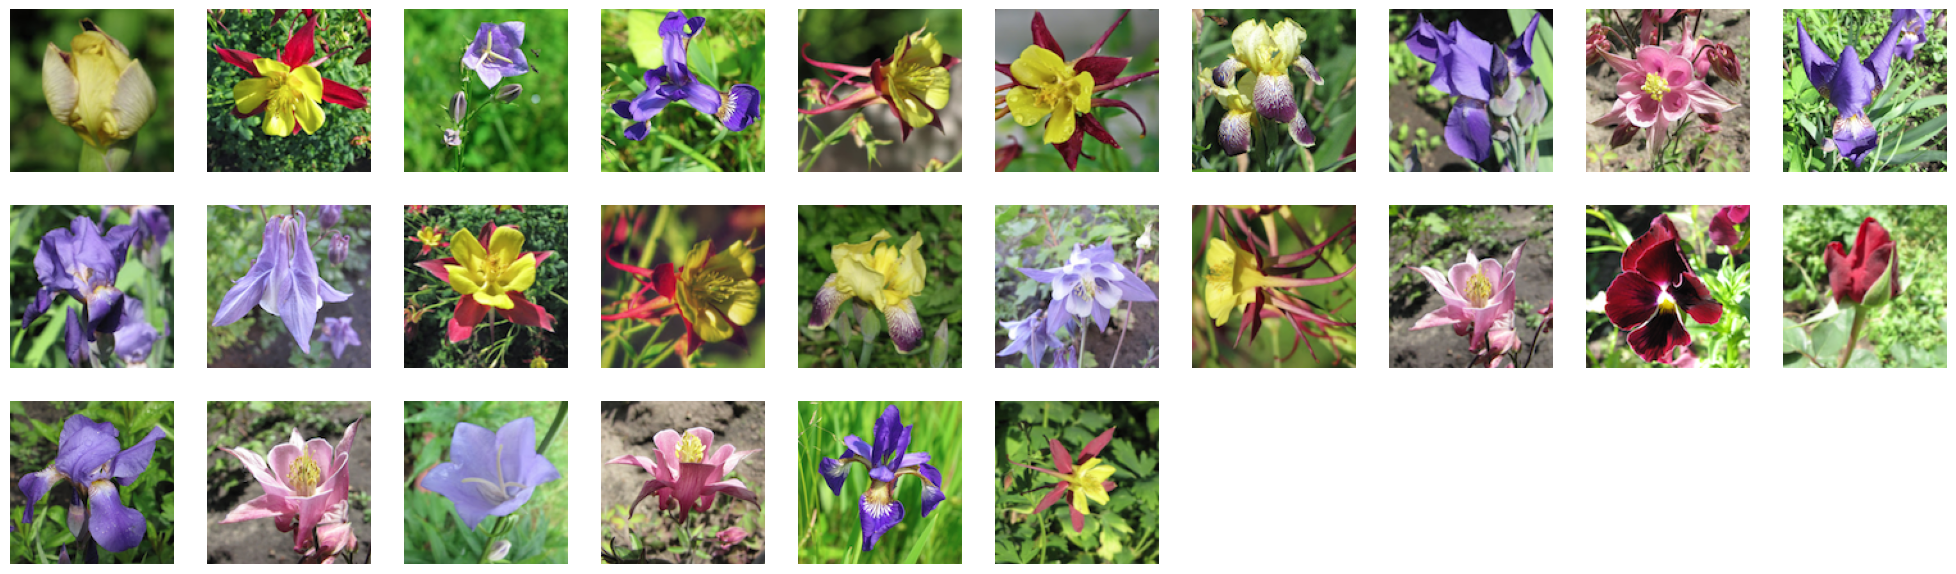

In [32]:
view_cluster(4)

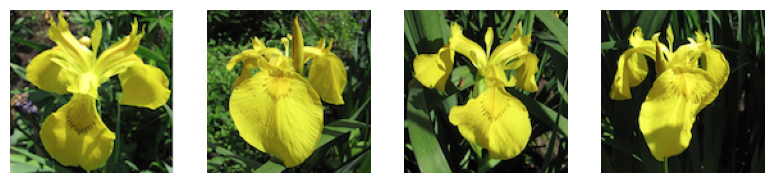

In [33]:
view_cluster(7)

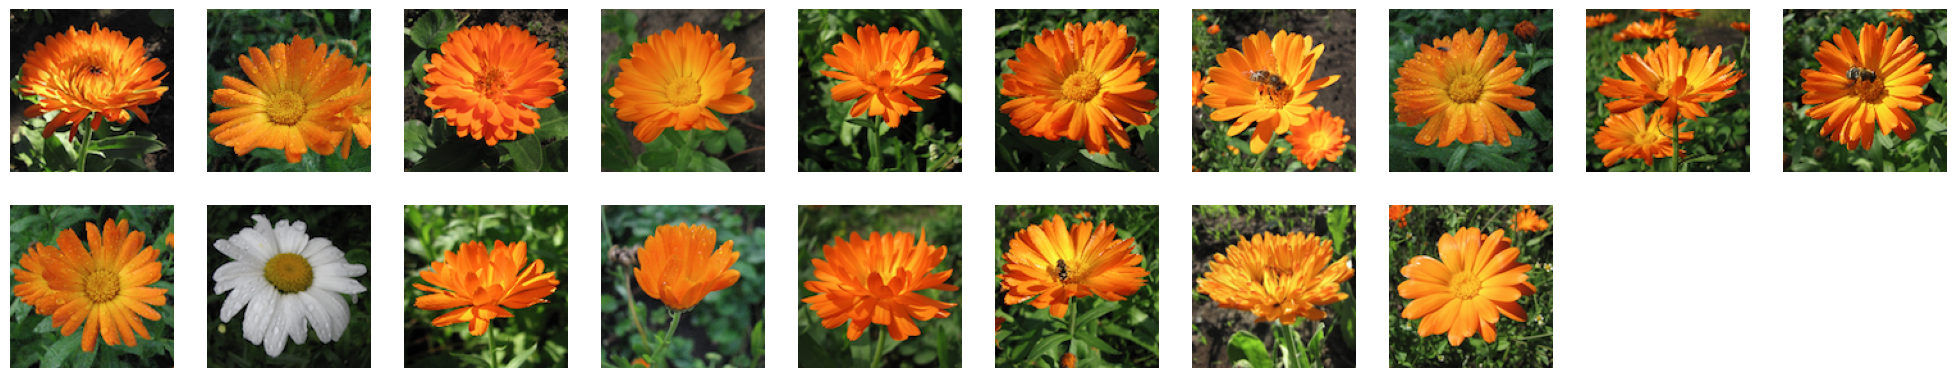

In [34]:
view_cluster(2)